Check running TensorFlow version

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

# Sentiment movie reviews classification

This a binary classification problem (2 classes, negative and positive). 

The dataset I will use is [IMDB reviews](https://ai.stanford.edu/~amaas/data/sentiment/), It contains a set of 25,000 highly polar movie reviews for training, and 25,000 for testing.

I will use a basic dense model to start with and find out how well it can on this dataset. 1D conv, LSTM, GRU, Bidirectional are stuff I can try later.

In [63]:
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
%matplotlib inline

import random as rand

import numpy as np

## Load IMDB review and get familiar with it

In [3]:
vocab_size = 10000
(train_x, train_y), (test_x, test_y) = datasets.imdb.load_data(num_words=vocab_size)

In [4]:
train_x.shape, train_y.shape

((25000,), (25000,))

In [5]:
test_x.shape, test_y.shape

((25000,), (25000,))

Load the word index dictionary and reverse a few triaing strings

Note: the indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".

In [16]:
word_index = datasets.imdb.get_word_index()
word_index_reversed = {v: k for k, v in word_index.items()}

88584

In [61]:
random_indecies = rand.choices(list(range(train_x.shape[0])), k=2)

for index in random_indecies:
    sentence = " ".join([word_index_reversed.get(word - 3, '?') for word in train_x[index][1:]])
    print(sentence, end="\n\n")

claustrophobic camera angles that do not help the movie too long face only shots where you most of the time get the feeling that the lower half of the film is missing that the screen is cut off because there seems to be important actions going on but you cannot see them there is anyway already too much confusion in the movie so these viewing angles make it worse and do not contribute to ? visuals br br i like ? made movies and unconventional camera work i can handle deep and slow movies but this one is trying too hard to be something ? and fails in my opinion painfully br br nothing to get attached to to any of the characters because they are not worked out well enough to work out characters more is needed than just minute long face shots at least with this set of script director actors br br i wonder whether some of the not so good acting is due to the script and director or due to the actors br br i will stay away from films both written and directed by le you for sure in the future 

## Check how balanced the data is

In [62]:
from collections import Counter

labels_counter = Counter(list(map(int, train_y)))
labels_counter = {k: v for k, v in labels_counter.items()}
labels_counter

{1: 12500, 0: 12500}

## Pad the training and test data

Because of input data is of different sizes, I will set a max length limit on them or pad them if their length was shorter than max length

In [68]:
max_length = 20

# Default :: padding='pre', truncating='pre',
train_x = pad_sequences(train_x, maxlen=max_length)
test_x = pad_sequences(test_x, maxlen=max_length)

In [70]:
train_x.shape, test_x.shape

((25000, 20), (25000, 20))

## Train

In [78]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 64, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 64)            640000    
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                20496     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 660,785
Trainable params: 660,785
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(x=train_x, y=train_y, validation_split=0.2, shuffle=True, batch_size=256, epochs=10)
history.history.keys()

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 35us/sample - loss: 0.6587 - accuracy: 0.6309 - val_loss: 0.5727 - val_accuracy: 0.7174
Epoch 2/10
20000/20000 [==============================] - 0s 18us/sample - loss: 0.4512 - accuracy: 0.8015 - val_loss: 0.5008 - val_accuracy: 0.7494
Epoch 3/10
20000/20000 [==============================] - 0s 17us/sample - loss: 0.3116 - accuracy: 0.8736 - val_loss: 0.5340 - val_accuracy: 0.7324
Epoch 4/10
20000/20000 [==============================] - 0s 19us/sample - loss: 0.1952 - accuracy: 0.9323 - val_loss: 0.6015 - val_accuracy: 0.7298
Epoch 5/10
20000/20000 [==============================] - 0s 18us/sample - loss: 0.1032 - accuracy: 0.9701 - val_loss: 0.7304 - val_accuracy: 0.7218
Epoch 6/10
20000/20000 [==============================] - 0s 17us/sample - loss: 0.0442 - accuracy: 0.9898 - val_loss: 0.9119 - val_accuracy: 0.7086
Epoch 7/10
20000/20000 [==============================] -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

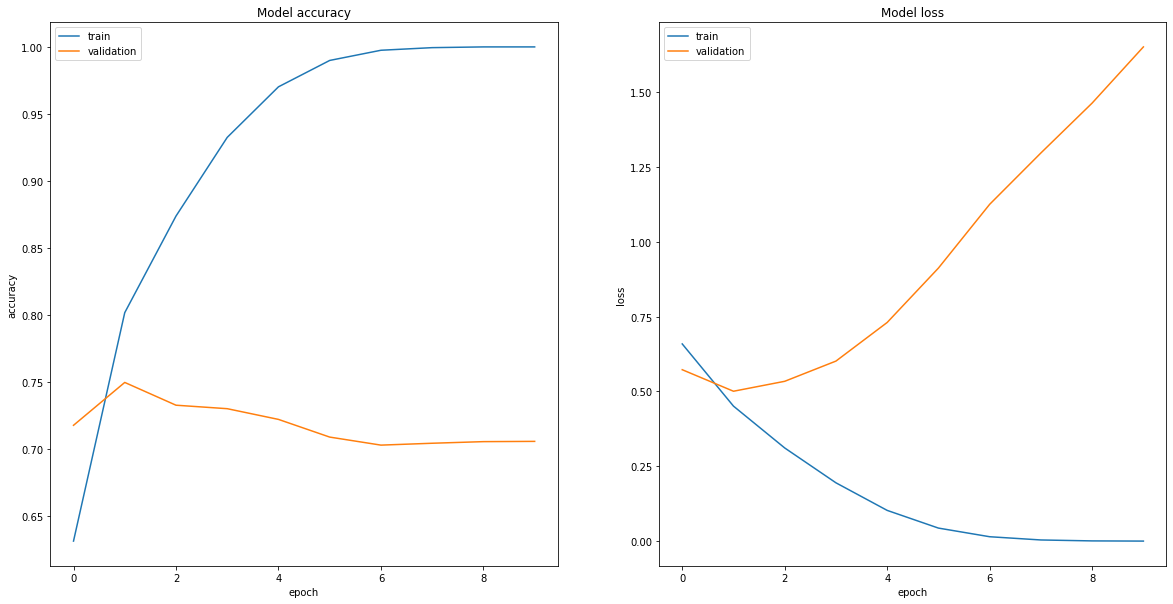

In [81]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

## Evaluate

In [82]:
loss, accuracy = model.evaluate(x=test_x, y=test_y)
loss, accuracy

25000/25000 [==============================] - 0s 16us/sample - loss: 1.6819 - accuracy: 0.7034


(1.6819232656288148, 0.70336)

## Predict on one sentence